In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving Chapter5_Geomechanical_Properties_Prediction_DataSet.xlsx to Chapter5_Geomechanical_Properties_Prediction_DataSet.xlsx


{'Chapter5_Geomechanical_Properties_Prediction_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
df=pd.read_excel('Chapter5_Geomechanical_Properties_Prediction_DataSet.xlsx')

In [5]:
df.describe()

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,7280.750000,146.141582,116.270437,0.059863,0.038633,2.652268,73.176217,123.929532
std,274.890887,322.464089,61.220418,0.023739,0.023542,0.072419,10.732976,19.252592
min,6805.000000,17.413170,24.463470,0.002870,0.002120,2.428950,50.805650,85.474240
25%,7042.875000,62.688825,84.264097,0.042928,0.019688,2.601138,64.791450,114.705535
50%,7280.750000,85.495010,117.570395,0.055185,0.037425,2.658085,72.718335,127.687235
75%,7518.625000,121.405745,130.947012,0.074783,0.054220,2.707355,80.846762,137.370110
max,7756.500000,7223.240720,623.150210,0.142080,0.119320,2.849760,101.455720,184.778790


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

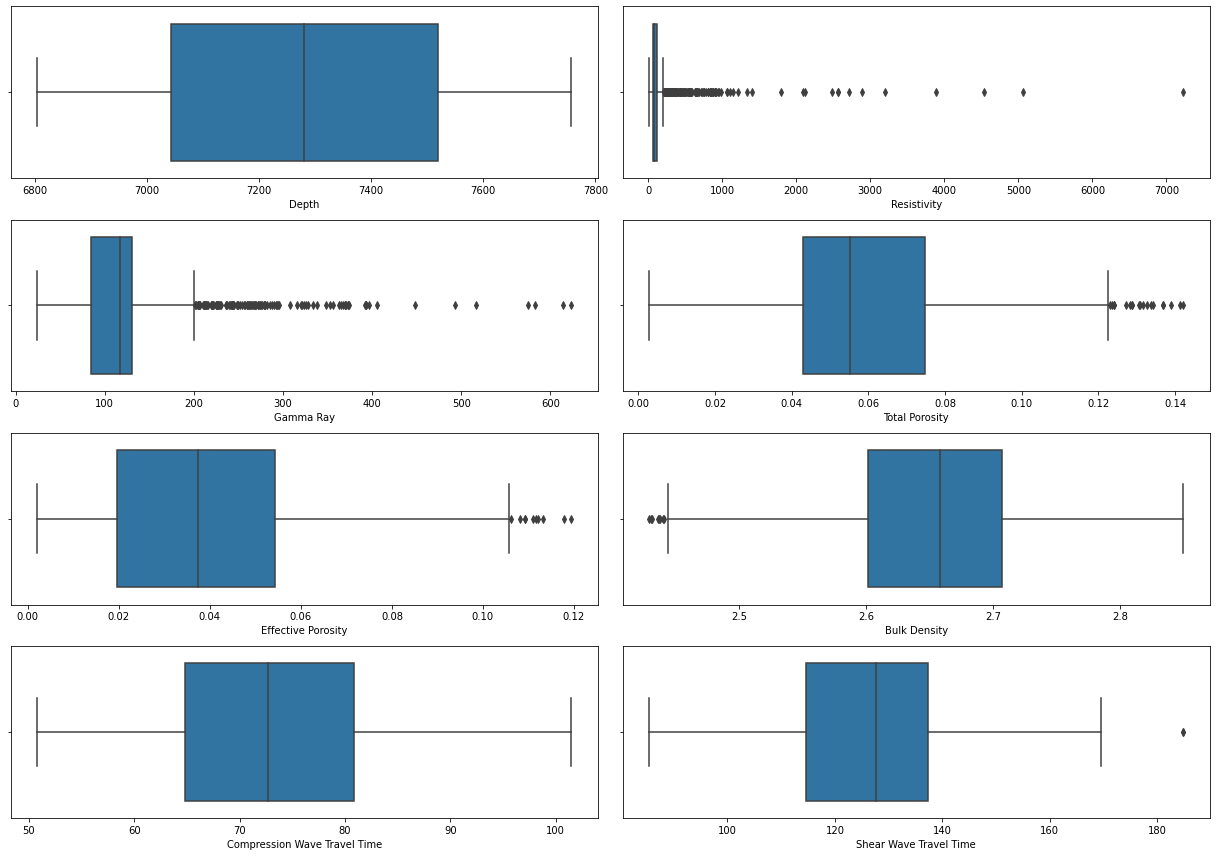

In [8]:
figure, axes=plt.subplots(4,2, figsize=(17,12))
sns.boxplot(df['Depth'], ax=axes[0,0])
sns.boxplot(df['Resistivity'], ax=axes[0,1])
sns.boxplot(df['Gamma Ray'], ax=axes[1,0])
sns.boxplot(df['Total Porosity'], ax=axes[1,1])
sns.boxplot(df['Effective Porosity'], ax=axes[2,0])
sns.boxplot(df['Bulk Density'], ax=axes[2,1])
sns.boxplot(df['Compression Wave Travel Time'], ax=axes[3,0])
sns.boxplot(df['Shear Wave Travel Time'], ax=axes[3,1])
plt.tight_layout()

0.12262499999999998


In [9]:
df1=df[(df['Resistivity']>0)&(df['Resistivity']<1000)]

In [15]:
df2=df[(df['Resistivity']>0)&(df['Resistivity']<1000)]

In [19]:
#let us take these data only to use 
df1=df[(df['Gamma Ray']>0)&(df['Gamma Ray']<400)&(df['Resistivity']>0)&(df['Resistivity']<1000)]

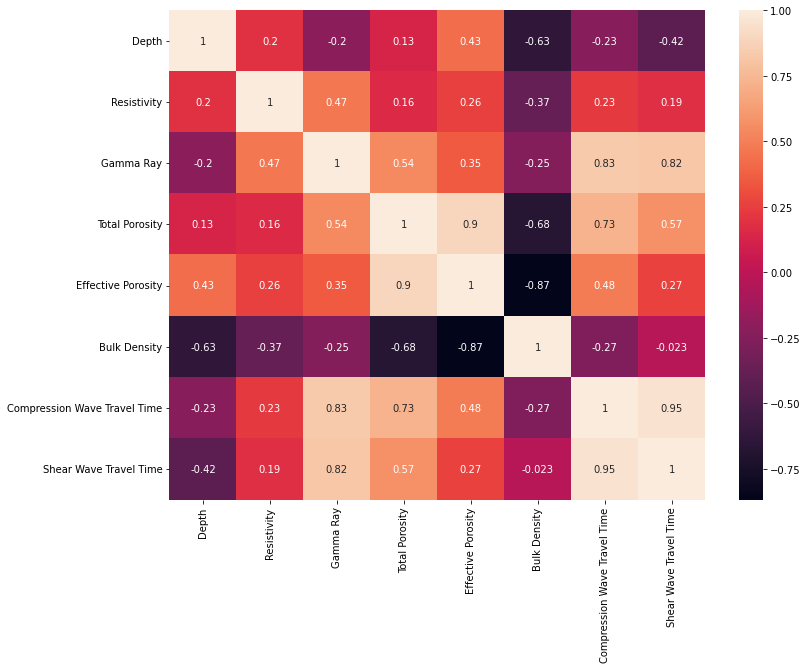

In [20]:
plt.figure(figsize=(12,9))
sns.heatmap(df1.corr(), annot=True)
#here we see same correlation between effective and total porosity which tells that it's clean sand
#so we also notice that total porosity has higher correlation with the output features(compression and shear time) than eff.porosity
#this implies dropping the effective poro. columns

In [26]:
df1.drop(['Effective Porosity'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df1)

In [75]:
print(scaled)

[[0.00000000e+00 4.13468578e-02 2.31242246e-01 ... 8.00384972e-01
  3.14509541e-01 3.88477970e-01]
 [5.26592944e-04 4.27769467e-02 2.37876216e-01 ... 8.00004753e-01
  3.15918043e-01 3.86012121e-01]
 [1.05318589e-03 4.91360168e-02 2.42027209e-01 ... 7.76003422e-01
  3.16072266e-01 3.81965378e-01]
 ...
 [9.97893628e-01 6.28517417e-01 1.56516175e-01 ... 5.65457095e-01
  5.96641998e-02 8.92956063e-02]
 [9.99473407e-01 5.76630913e-01 1.19221384e-01 ... 6.15741071e-01
  1.51118218e-03 6.17068402e-02]
 [1.00000000e+00 6.61815636e-01 7.63945442e-02 ... 6.44067394e-01
  0.00000000e+00 4.65803430e-02]]


In [71]:
df1_scaled=pd.DataFrame(scaled, columns=df1.columns)

In [72]:
df1_scaled.head(1)

,Depth,Resistivity,Gamma Ray,Total Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
0,0.0,0.041347,0.231242,0.202978,0.800385,0.31451,0.388478


In [76]:
y=df1_scaled[['Compression Wave Travel Time','Shear Wave Travel Time']] #output
x=df1_scaled.drop(['Compression Wave Travel Time','Shear Wave Travel Time'], axis=1)#input

In [77]:
print(x)
print(y)

         Depth  Resistivity  Gamma Ray  Total Porosity  Bulk Density
0     0.000000     0.041347   0.231242        0.202978      0.800385
1     0.000527     0.042777   0.237876        0.222757      0.800005
2     0.001053     0.049136   0.242027        0.231054      0.776003
3     0.001580     0.047419   0.246264        0.196681      0.760367
4     0.002106     0.046314   0.250608        0.184458      0.779259
...        ...          ...        ...             ...           ...
1871  0.996840     0.025039   0.095539        0.166901      0.539911
1872  0.997367     0.095893   0.126890        0.120602      0.557972
1873  0.997894     0.628517   0.156516        0.083265      0.565457
1874  0.999473     0.576631   0.119221        0.023557      0.615741
1875  1.000000     0.661816   0.076395        0.000000      0.644067

[1876 rows x 5 columns]
      Compression Wave Travel Time  Shear Wave Travel Time
0                         0.314510                0.388478
1                         0.3

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1000)

In [79]:
from pandas.core.common import random_state
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor #used this since we have multi outputs
#regression since dealing with 

SVM=MultiOutputRegressor((SVR(kernel='rbf', gamma=1, C=1)))


In [115]:
SVM.fit(x_train,y_train)
y_pred_test=SVM.predict(x_test)
y_pred_train=SVM.predict(x_train)

In [116]:
print(y_pred_test)

[[0.36258932 0.37941592]
 [0.615954   0.5344317 ]
 [0.48949314 0.43891036]
 ...
 [0.30324413 0.21766208]
 [0.81587068 0.66715215]
 [0.5333285  0.42773967]]


In [91]:
from sklearn.metrics import r2_score
cwt=r2_score(y_train['Compression Wave Travel Time'], y_pred_train[:,0])
swt=r2_score(y_train['Shear Wave Travel Time'], y_pred_train[:,1])
print(f'Compression wave travel time train data: {cwt}')
print(f'Shear wave travel time train data: {swt}')

Compression wave travel time train data: 0.9241422912756379
Shear wave travel time train data: 0.9111317454124417


In [92]:
cwt1=r2_score(y_test['Compression Wave Travel Time'], y_pred_test[:,0])
swt1=r2_score(y_test['Shear Wave Travel Time'], y_pred_test[:,1])
print(f'Compression wave travel time test data: {cwt1}')
print(f'Shear wave travel time test data: {swt1}')

Compression wave travel time test data: 0.9247498713669453
Shear wave travel time test data: 0.9226109088849322


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_train['Compression Wave Travel Time'], y_pred_train[:,0]))
print(mean_squared_error(y_train['Compression Wave Travel Time'], y_pred_train[:,0]))
print(np.sqrt(mean_squared_error(y_train['Compression Wave Travel Time'], y_pred_train[:,0])))
# do the same for testing 

0.04520312261021315
0.003496222273412372
0.05912886159408425


I will put a simple code just to get the outliers of total porosity
(not included in the SVM but just a note)

In [ ]:
Q1 = np.percentile(df['Total Porosity'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Total Porosity'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

upper = df['Total Porosity'] >= (Q3+1.5*IQR)
upp=(Q3+1.5*IQR)
print(upp)
#print("Upper bound:",upper)
#print(np.where(upper))
 
# Below Lower bound
lower = df['Total Porosity'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
#print(np.where(lower))